In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
# Load the Boston Housing dataset

df = pd.read_csv('HousingData.csv')
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# Split the data into training and testing sets
X = df.drop('MEDV', axis=1) # 'medv' is the target variable
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared: ", r, "\n")


Mean Squared Error: 34.98738954423873
R-squared:  0.5703296053895563 



In [7]:
print(y_pred,"\n")
print(y_test)


[26.175296   22.64747588 29.1456294  11.52971235 21.65312134 19.42320699
 20.18413017 21.46914355 19.1985363  19.98228162  4.32483046 16.16891668
 16.87682404  5.31232373 39.36827861 33.09358732 21.9152876  36.61918436
 31.52676377 23.52713482 24.96022461 23.69866912 20.88033802 30.55074901
 22.74081741  8.66805959 17.65119072 17.93088633 36.01223185 21.16299556
 17.83464361 17.43306603 19.5240167  23.50605522 28.97262793 19.21808862
 11.23997435 23.94256597 17.86786717 15.40849806 26.3630836  21.5193299
 23.78733694 14.84041522 23.9445175  24.97067627 20.11366175 23.08636158
 10.42208266 24.52832122 21.60847326 18.66228165 24.53362832 31.03502944
 12.97457826 22.38536236 21.34822822 16.10928673 12.37477824 22.78596712
 18.28714824 21.91802045 32.49771603 31.21256855 17.47867791 33.18861907
 19.17896285 19.94662594 20.17142015 23.90228857 22.81288844 24.17911208
 30.83402844 28.87481037 25.14581721  5.55072029 37.0183454  24.15428003
 27.67587636 19.63884644 28.74874123 18.83204358 17.

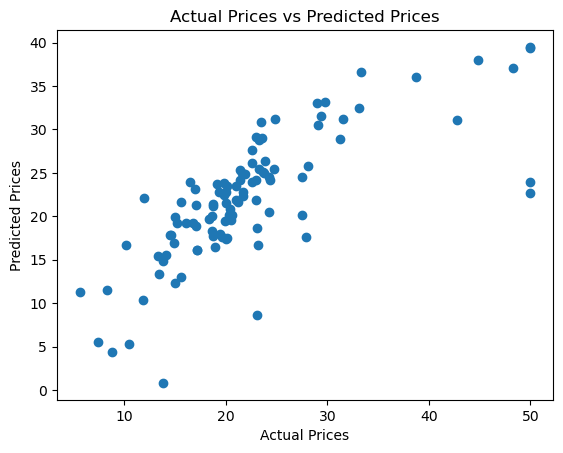

In [8]:
# Scatter plot of predicted prices vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

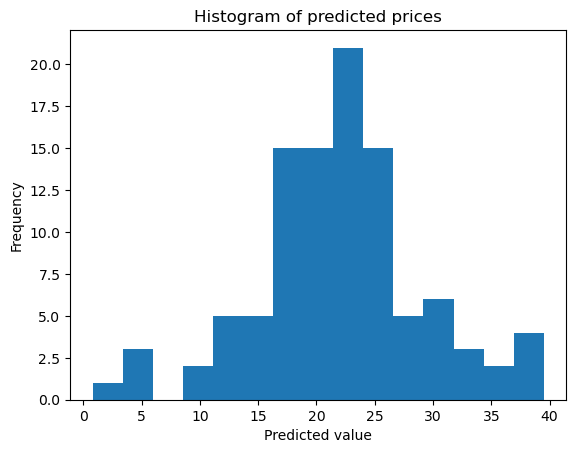

In [9]:
plt.hist(y_pred, bins=15)
plt.xlabel('Predicted value')
plt.ylabel('Frequency')
plt.title('Histogram of predicted prices')
plt.show()

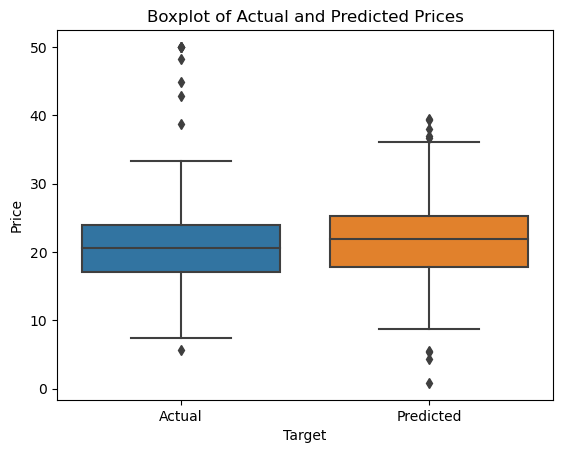

In [13]:
import seaborn as sns

# Create a DataFrame to store the predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a boxplot of the predicted prices
sns.boxplot(data=predictions[['Actual', 'Predicted']])
plt.xlabel('Target')
plt.ylabel('Price')
plt.title('Boxplot of Actual and Predicted Prices')
plt.show()


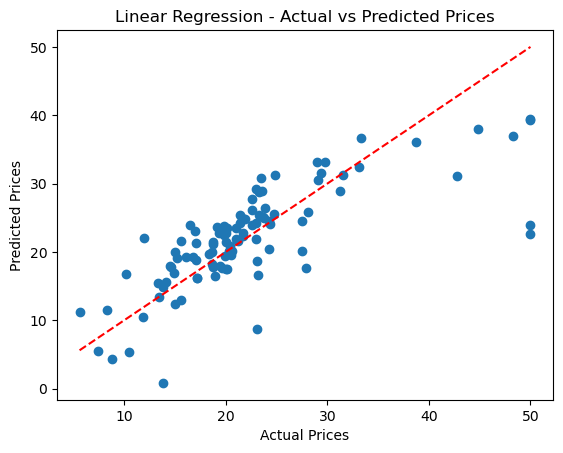

In [11]:
import matplotlib.pyplot as plt

# Plotting the linear graph
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression - Actual vs Predicted Prices')
plt.show()


In [12]:
# You can use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'CRIM': [0.01, 0.02],
    'ZN': [18.0, 0.0],
    'INDUS': [2.31, 7.07],
    'CHAS': [0, 1],
    'NOX': [0.538, 0.469],
    'RM': [6.575, 6.421],
    'AGE': [65.2, 78.9],
    'DIS': [4.09, 4.9671],
    'RAD': [1, 2],
    'TAX': [296, 242],
    'PTRATIO': [15.3, 17.8],
    'B': [396.9, 393.24],

    'LSTAT': [5.28, 8.27]
    
})
predicted_prices = model.predict(new_data)
print("Predicted Prices:", predicted_prices)


Predicted Prices: [30.5987113  28.01034728]
